In [2]:
import numpy as np
import pandas as pd
from skimage.io import imread, imshow
from skimage.transform import rescale
import skimage
import bitarray
import matplotlib.pyplot as plt

import os
print(os.listdir("Desktop/input"))



['.ipynb_checkpoints', 'chernobyl.jpg', 'img.jpg', 'mykolaiv air base.jpg', 'script1.txt', 'script2.txt', 'script3.txt', 'Stegy (1).ipynb']


In [3]:
All_SW_Scripts = ""

def ReadFile(txt):
    with open(txt, "r") as file:
        script = file.read()
        return script

All_SW_Scripts += ReadFile("Desktop/input/script1.txt")
All_SW_Scripts += ReadFile("Desktop/input/script2.txt")
All_SW_Scripts += ReadFile("Desktop/input/script3.txt")

print(All_SW_Scripts[:1000])


OperationRedhawkReportEyesOnly
Recipient:XYZGovernmentOfficials
AgentCode:SierraTangoAlphaCharlieHotel
Message:OperationCrimsonStarisinfullswing.Enemytroopshaveestablishedaovertbaseatcoordinates38.9066Â°N,77.0372Â°W.
Thismessagewillselfdestructin30seconds.Recipient:DirectorofIntelligence,XYZ Government
Sender:AgentEcho-Niner
Message:MissionPhoenixisago.EnemyforceshavesecuredapackageinSector 7-B.Interceptatyourearliestdiscretion.
CodeBreakdown:MissionPhoenix:Referstothecovertoperation.
PackageinSector7-B:Indicatesthetargetofthemission.
Exerciseextremediscretionwhenhandlingthismessage.Itcontainsvitalintelligence.Recipient:HighCommand,XYZ Military
Sender:FieldCommanderAlpha-One
Message:OperationSilentThunderisasuccess.Enemyforcesandtheirmunitionshavebeencaptured.Leaderofthecovertterroristorganizationeliminated.
CodeBreakdown:OperationSilentThunder:Referstothesuccessfuloperation.
Enemyforcesandmunitionscaptured:Indicatestheoperation'ssuccessincapturingtheenemyandtheirweaponry.
Leaderofthec

Image is 2160 by 3840 pixels with 3 color channels


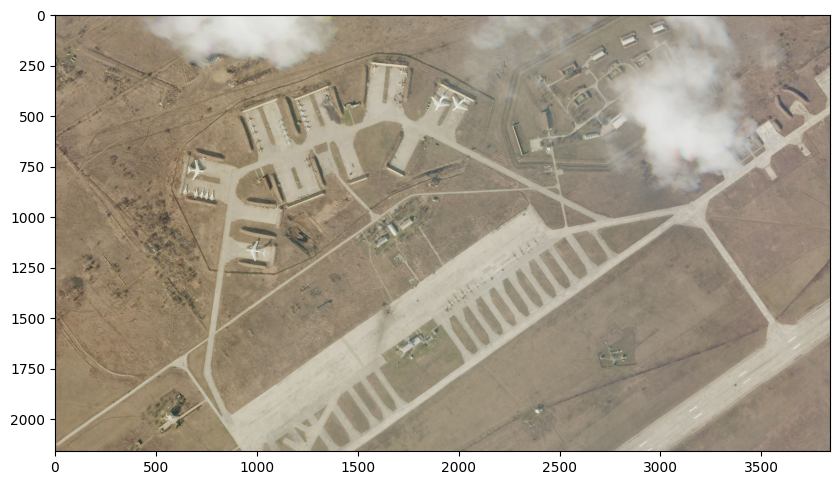

In [4]:
mykolaiv_img = imread("Desktop/input/mykolaiv air base.jpg")

plt.figure(figsize=(10, 10))
plt.imshow(mykolaiv_img)

print("Image is "+str(mykolaiv_img.shape[0])+" by "+str(mykolaiv_img.shape[1])+" pixels with "+str(mykolaiv_img.shape[2])+" color channels")

In [5]:
def MessageToBits(message):
    #tag message (and pad w/ spaces till 10 characters)
    tag = "{:<10}".format(str(len(message)*8))
    message = tag+message
    #convert to bits
    code = bitarray.bitarray()
    code.frombytes(message.encode('utf-8'))
    code = "".join(['1' if x == True else '0' for x in code.tolist()])
    return code

In [6]:
def CheckBitSize(img, message):
    h = img.shape[0]
    w = img.shape[1]
    try:
        c = img.shape[2]
    except:
        c = 1
    image_max_size = h*w*c*2
    string_size = len(message)
    print("Message is "+str(string_size/8000)+" KB and image can fit "+str(image_max_size/8000)+" KB of data")
    if string_size > image_max_size:
        print("Message is too big to be encoded in image")
        return False
    else:
        print("Image can be encoded with message. Proceed")
        return True
    
CheckBitSize(mykolaiv_img, MessageToBits(All_SW_Scripts))

Message is 1.172 KB and image can fit 6220.8 KB of data
Image can be encoded with message. Proceed


True

In [7]:
def CheckBitSize(img, message):
    h = img.shape[0]
    w = img.shape[1]
    try:
        c = img.shape[2]
    except:
        c = 1
    image_max_size = h*w*c*8
    string_size = len(message)
    print("Message is "+str(string_size/8000)+" KB and image can fit "+str(image_max_size/8000)+" KB of data")
    if string_size > image_max_size:
        print("Message is too big to be encoded in image")
        return False
    else:
        print("Image can be encoded with message. Proceed")
        return True
    
CheckBitSize(mykolaiv_img, MessageToBits(All_SW_Scripts))

Message is 1.172 KB and image can fit 24883.2 KB of data
Image can be encoded with message. Proceed


True

In [8]:
def EncodeImage(img, message):
    code = MessageToBits(message)
    if CheckBitSize(img, code):
        shape = img.shape
        img = img.flatten()
        code = list(code)
        code_len = len(code)
        for i,x in enumerate(img):
            if i*2 <code_len:
                zbits = list('{0:08b}'.format(x))[:6]+code[i*2:i*2+2]
                img[i] = int("".join(zbits), 2)
            else:
                return img.reshape(shape)
        return img.reshape(shape)

encoded_img = EncodeImage(mykolaiv_img, All_SW_Scripts)

Message is 1.172 KB and image can fit 24883.2 KB of data
Image can be encoded with message. Proceed


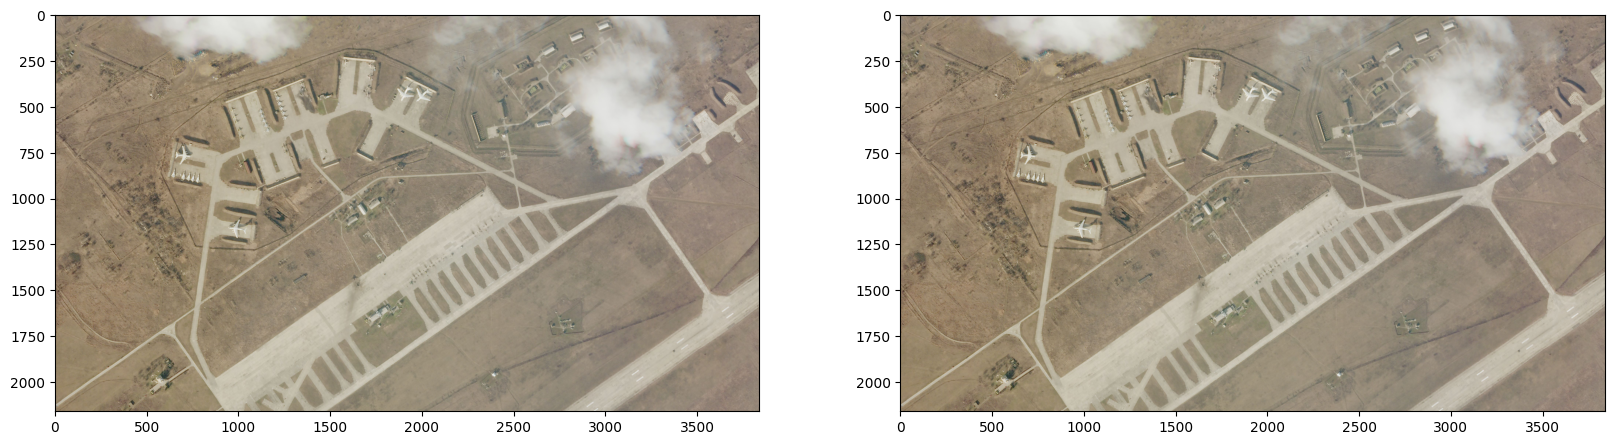

In [9]:
def CompareTwoImages(img1,img2):
    fig=plt.figure(figsize=(20, 20))

    fig.add_subplot(2, 2, 1)
    plt.imshow(img1)
    fig.add_subplot(2, 2, 2)
    plt.imshow(img2)

    plt.show()
CompareTwoImages(mykolaiv_img, encoded_img)

In [10]:
print(mykolaiv_img[200][200])
print(encoded_img[200][2])


[151 131 107]
[137 124 105]


In [11]:
def DecodeImage(img):
    bit_message = ""
    bit_count = 0
    bit_length = 200
    for i,x in enumerate(img):
        for j,y in enumerate(x):
            for k,z in enumerate(y):
                zbits = '{0:08b}'.format(z)
                bit_message += zbits[-2:]
                bit_count += 2
                if bit_count == 80:
                    try:
                        decoded_tag = bitarray.bitarray(bit_message).tobytes().decode('utf-8')
                        bit_length = int(decoded_tag)+80
                        bit_message = ""
                    except:
                        print("Image does not have decode tag. Image is either not encoded or, at least, not encoded in a way this decoder recognizes")
                        return
                elif bit_count >= bit_length:
                    return bitarray.bitarray(bit_message).tobytes().decode('utf-8')

# Split the message at newline characters and print each part
message = All_SW_Scripts

message_parts = message.strip().split('\n')
for part in message_parts:
    print(part)



OperationRedhawkReportEyesOnly
Recipient:XYZGovernmentOfficials
AgentCode:SierraTangoAlphaCharlieHotel
Message:OperationCrimsonStarisinfullswing.Enemytroopshaveestablishedaovertbaseatcoordinates38.9066Â°N,77.0372Â°W.
Thismessagewillselfdestructin30seconds.Recipient:DirectorofIntelligence,XYZ Government
Sender:AgentEcho-Niner
Message:MissionPhoenixisago.EnemyforceshavesecuredapackageinSector 7-B.Interceptatyourearliestdiscretion.
CodeBreakdown:MissionPhoenix:Referstothecovertoperation.
PackageinSector7-B:Indicatesthetargetofthemission.
Exerciseextremediscretionwhenhandlingthismessage.Itcontainsvitalintelligence.Recipient:HighCommand,XYZ Military
Sender:FieldCommanderAlpha-One
Message:OperationSilentThunderisasuccess.Enemyforcesandtheirmunitionshavebeencaptured.Leaderofthecovertterroristorganizationeliminated.
CodeBreakdown:OperationSilentThunder:Referstothesuccessfuloperation.
Enemyforcesandmunitionscaptured:Indicatestheoperation'ssuccessincapturingtheenemyandtheirweaponry.
Leaderofthec

In [12]:
print(message == All_SW_Scripts)

True


Image is 3840 by 5120 pixels


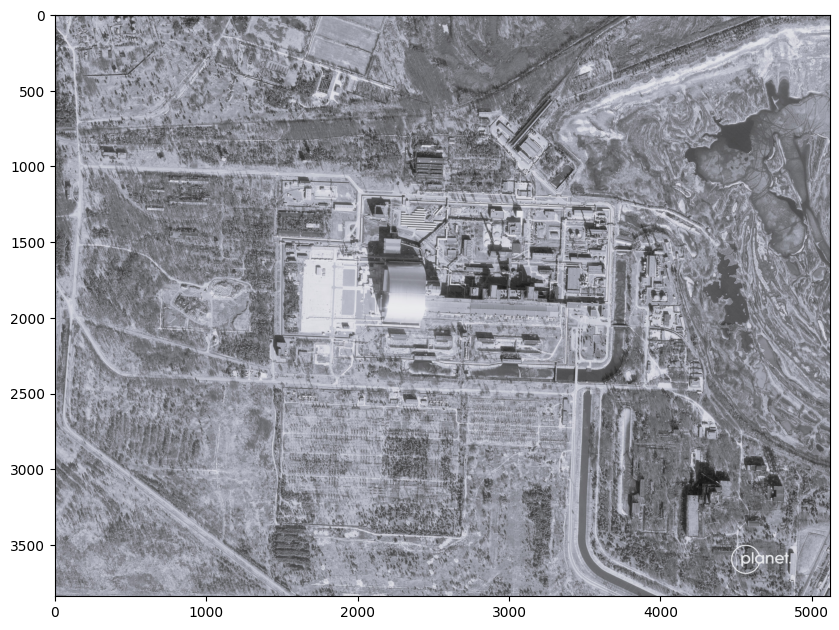

In [13]:
plans_img = imread("Desktop/input/chernobyl.jpg")

plt.figure(figsize=(10, 10))
plt.imshow(plans_img, cmap="gray")

print("Image is "+str(plans_img.shape[0])+" by "+str(plans_img.shape[1])+" pixels")

Image is 1920 by 2560 pixels with 3 color channels


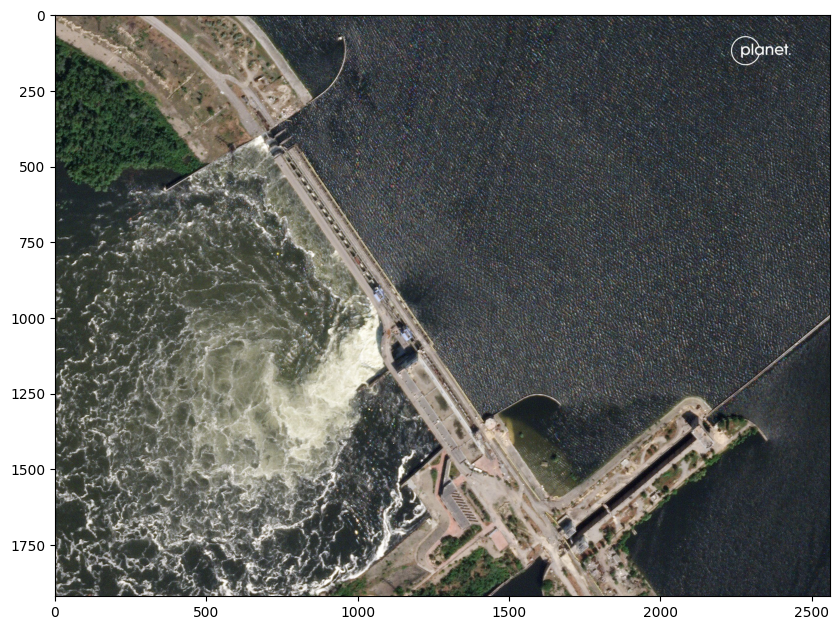

In [14]:
kakhovka_img = imread("Desktop/input/img.jpg")

plt.figure(figsize=(10, 10))
plt.imshow(kakhovka_img)

print("Image is "+str(kakhovka_img.shape[0])+" by "+str(kakhovka_img.shape[1])+" pixels with "+str(kakhovka_img.shape[2])+" color channels")

In [15]:
def ImageToBits(img):
    try:
        channels = str(img.shape[2])
    except:
        channels = "1"
    tag = "{:<20}".format("img,"+str(img.shape[0])+","+str(img.shape[1])+","+channels)
    #convert tag to bits
    code = bitarray.bitarray()
    code.frombytes(tag.encode('utf-8'))
    tag = "".join(['1' if x == True else '0' for x in code.tolist()])
    # combine tag bits with the images bits
    bits_string = tag + ''.join(['{0:08b}'.format(x) for x in list(img.flatten())])
    return bits_string
    
test_image_bits = ImageToBits(kakhovka_img)
print(test_image_bits[:1000])

0110100101101101011001110010110000110001001110010011001000110000001011000011001000110101001101100011000000101100001100110010000000100000001000000010000000100000100101111000010101101111100110011000011101110011100111101000110101111011101001001001001010000100101001011001001010001011101001011001001010001110101010101001100010011000101100011001111010100000110000101011001010110011110001111011011110110111110010111011110010111001110010101011101110110100101111101011001010100110101010101001111010001110100101011000101001110110100001110111110001100110100010101000000001100111100000110111100001100010011110010110111001011010011110010110111001011100100000110111011101101001100000100111011001100110011111100111000101100001100000100111010101100010011111000111000001011010011111010111000101011001011111110111000001011001100001110111100001100011100100011000000101110010100001100111010101101011011100010101111101011011011001110101100001010011011001100101101001001110011001010101110001001101011010110110001001010001

In [16]:
def MessageToBits(message):
    #tag message (and pad w/ spaces till 20 characters)
    tag = "{:<20}".format("text,"+str(len(message)*8))
    message = tag+message
    #convert to bits
    code = bitarray.bitarray()
    code.frombytes(message.encode('utf-8'))
    code = "".join(['1' if x == True else '0' for x in code.tolist()])
    return code

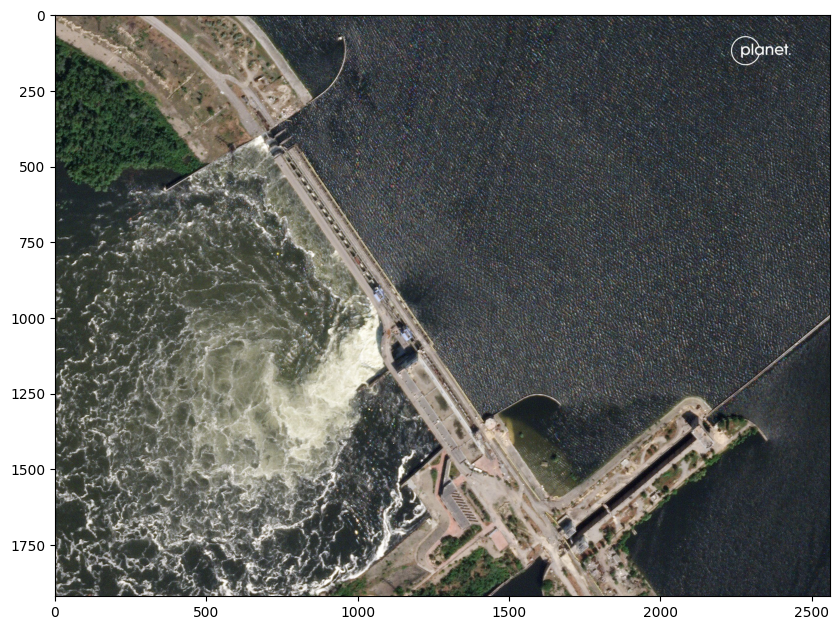

In [17]:
def BitsToImage(bits_string):
    try:
        tag = bits_string[:160]
        tag = bitarray.bitarray(tag).tobytes().decode('utf-8')
        tag = tag.split(",")
        image_bits = bits_string[160:]
        h = int(tag[1])
        w = int(tag[2])
        c = int(tag[3])
        image_bits = np.asarray([int(image_bits[i:i+8], 2) for i in range(0, len(image_bits), 8)])
        if c == 1:
            image_bits = image_bits.reshape([h,w])
        else:
            image_bits = image_bits.reshape([h,w,c])
        return image_bits.astype(np.uint8)
    except:
        print('Not a string of image bits')
    
    
output_test = BitsToImage(test_image_bits)

plt.figure(figsize=(10, 10))
plt.imshow(output_test)

In [18]:
%%time
def EncodeImage(img, message):
    if type(message) is str:
        code = MessageToBits(message)
    else:
        code = ImageToBits(message)
    if CheckBitSize(img, code):
        shape = img.shape
        img = img.flatten()
        code = list(code)
        code_len = len(code)
        for i,x in enumerate(img):
            if i*2 <code_len:
                zbits = list('{0:08b}'.format(x))[:6]+code[i*2:i*2+2]
                img[i] = int("".join(zbits), 2)
            else:
                return img.reshape(shape)
        return img.reshape(shape)

encoded_img = EncodeImage(plans_img,kakhovka_img)

Message is 14745.62 KB and image can fit 58982.4 KB of data
Image can be encoded with message. Proceed
CPU times: total: 2min 12s
Wall time: 2min 38s


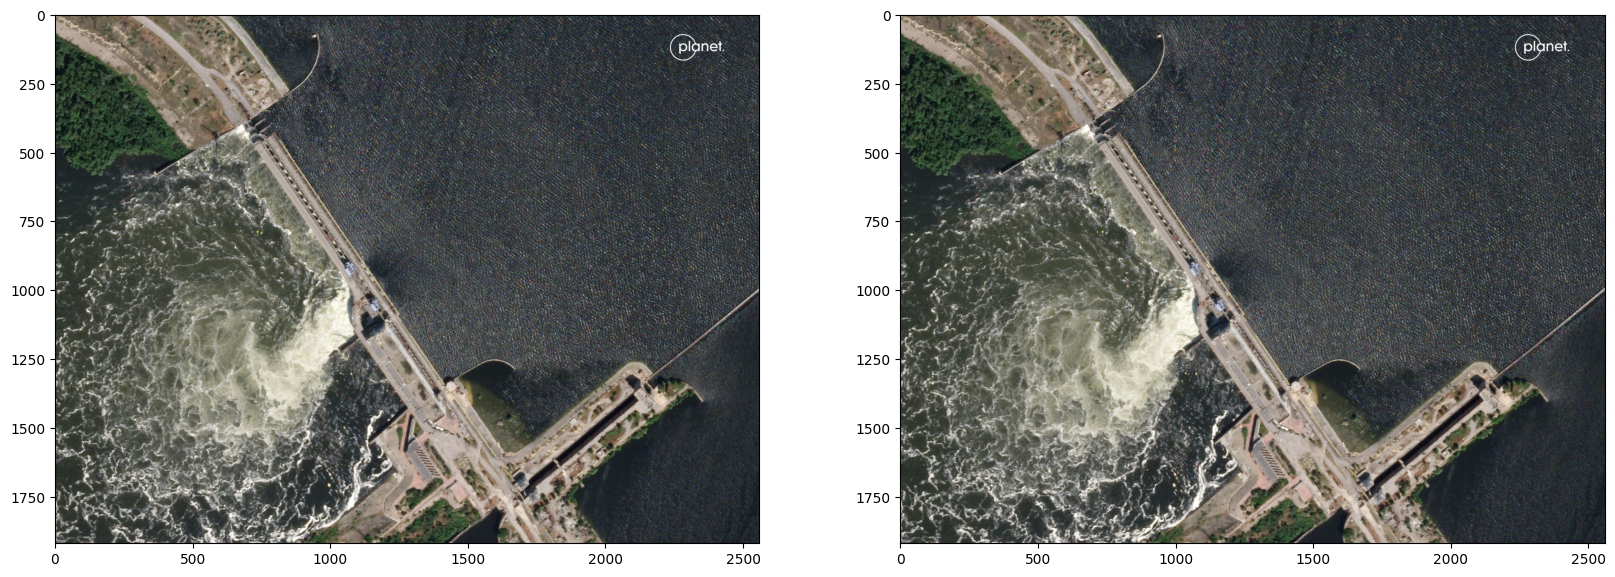

In [30]:
#enncoded_img = imread("Desktop/input/img.jpg")
CompareTwoImages(kakhovka_img, enncoded_img)

In [20]:
print(kakhovka_img[200][200])
print(encoded_img[200][200])

[52 76 44]
[116 119 123]


In [25]:
%%time
def DecodeImage(img):
    bit_message = ""
    bit_count = 0
    bit_length = 200
    grey = len(img.shape) == 2
    for i,x in enumerate(img):
        for j,y in enumerate(x):
            if grey:
                y = [y]
            for k,z in enumerate(y):
                zbits = '{0:08b}'.format(z)
#                 print(zbits[-2:])
                bit_message += zbits[-2:]
                bit_count += 2
                if bit_count == 160:
                    try:
                        decoded_tag = bitarray.bitarray(bit_message).tobytes().decode('utf-8').split(",")
                        message_type = decoded_tag[0]
                        if message_type == "text":  
                            bit_length = int(decoded_tag[1])+160
                            bit_message = ""
                        else:
                            bit_length = (int(decoded_tag[1])*int(decoded_tag[2])*int(decoded_tag[3])*8)+160
                    except:
                        print("Image does not have decode tag. Image is either not encoded or, at least, not encoded in a way this decoder recognizes")
                        return
                elif bit_count >= bit_length:
                    if message_type == "text":
                        return bitarray.bitarray(bit_message).tobytes().decode('utf-8')
                    else:
                        return BitsToImage(bit_message)

decoded_img = DecodeImage(encoded_img)

CPU times: total: 12min 29s
Wall time: 14min 39s


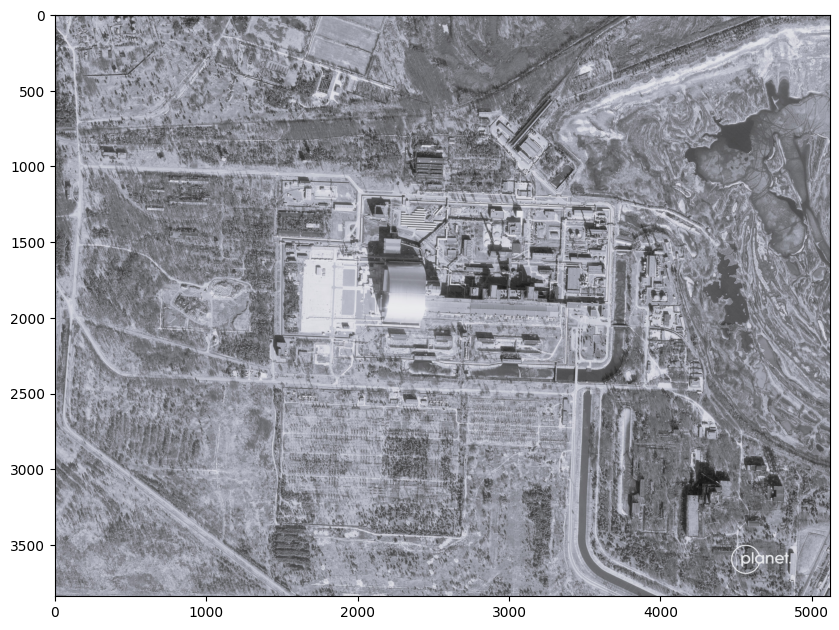

In [24]:
#decoded_img = imread("Desktop/input/chernobyl.jpg")
plt.figure(figsize=(10, 10))
plt.imshow(decoded_img, cmap="gray")